In [1]:
import numpy as np
import scipy.special

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

np.random.seed(0)

In [2]:
class MultiLayers_Classifier:
    
    def __init__(self, num_neurons_in_layer, learning_rate, epochs):
        # Number of neurons in layers:
        self.num_neurons_in_layer = num_neurons_in_layer
        # Learning rate:
        self.learning_rate = learning_rate
        # Number of learing loops:
        self.epochs = epochs
        
        # Initialization activation fucntion:
        self.activation_function = lambda x: scipy.special.expit(x)    
        # Number layers:
        self.num_layers = len(num_neurons_in_layer)
        # Initialization weights:
        self.Weigths = []
        
        # Generation layers of weigths:
        for layer in range(self.num_layers - 1):
            next_layer = num_neurons_in_layer[layer + 1]
            pres_layer = num_neurons_in_layer[layer]
            weights_layer = np.random.randn(next_layer, pres_layer) * np.sqrt(2 / (pres_layer + next_layer))
            self.Weigths.append(weights_layer)
                
    # Fit classifier:
    def fit_classifier(self, inputLayer_train, label):
        num_class = self.num_neurons_in_layer[-1]
        train_list = inputLayer_train
        num_samples = train_list.shape[0]
        targets_list = label
        for epoch in range(self.epochs):
            for sample in range(num_samples):
                inputLayer_values = train_list[sample]
                target = np.zeros(num_class) + 0.01
                target[int(targets_list[sample])] = 0.99
                Output_values = [inputLayer_values]
                
                # Forward propagation:
                for layer in range(self.num_layers - 1):
                    outputs = Output_values[layer]
                    new_outputs = self.activation_function(np.dot(self.Weigths[layer], outputs))
                    Output_values.append(new_outputs)
                
                Errors_values = []
                # Get errors:
                for layer in range(self.num_layers - 1):
                    if layer == 0:
                        errors = (Output_values[-1] - target) * Output_values[-1] * (1 - Output_values[-1])
                    else:
                        errors = np.dot(self.Weigths[-layer].T, Errors_values[layer - 1]) * Output_values[-layer - 1] * (1 - Output_values[-layer - 1])
                    Errors_values.append(errors)
                    
                # Back propagation:
                for layer in range(self.num_layers - 1):
                    rows = len(Errors_values[layer])
                    colums = len(Output_values[-layer - 2])
                    self.Weigths[-layer - 1] += -self.learning_rate * np.dot(Errors_values[layer].reshape(rows, 1), Output_values[-layer - 2].reshape(1, colums))
            
    def predict(self, inputLayer_test):
        answers = []
        data_test = inputLayer_test
        num_samples = data_test.shape[0]
        for sample in range(num_samples):
            inputLayer_test = data_test[sample]
            Output_values = [inputLayer_test]
            for layer in range(self.num_layers - 1):
                outputs = Output_values[layer]
                new_outputs = self.activation_function(np.dot(self.Weigths[layer], outputs))
                Output_values.append(new_outputs)
            
            answers.append(Output_values[-1])
        
        list_labels = []
        for i in range(len(answers)):
            if answers[i][0] > answers[i][1]:
                list_labels.append(0)
            else:
                list_labels.append(1)
        
        return answers, list_labels
    
    def get_score(self, y_getted, y_test):
        common_score = len(y_getted)
        score = 0.0
        for i in range(common_score):
            if y_getted[i] == y_test[i]:
                score += 1
            
        return score / common_score

In [3]:
mfcc_features = np.loadtxt('C:/Users/Alex/Desktop/VAD/mfcc_features.txt')

labels = np.zeros((mfcc_features.shape[0]))
data = np.zeros((mfcc_features.shape[0], mfcc_features.shape[1] - 1))
for i in range(mfcc_features.shape[0]):
    labels[i] = mfcc_features[i][0]
    data[i][:] = mfcc_features[i][1:]
    
data = normalize(data)
    
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7, random_state=42)

In [4]:
num_samples, num_features = X_train.shape
num_classes = 2
num_hidden_neurons_1 = 12
num_hidden_neurons_2 = 12
num_hidden_neurons_3 = 5
layers = [num_features, num_hidden_neurons_1, num_hidden_neurons_2, num_hidden_neurons_3, num_classes]

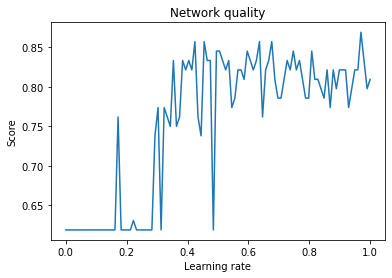

In [5]:
# Check learning rate:
epochs = 100
lr_list = np.linspace(0, 1, 100)

score = []
for lr in lr_list:
    clf = MultiLayers_Classifier(layers, lr, epochs)
    clf.fit_classifier(X_train, y_train)
    (answers, label) = clf.predict(X_test)
    score.append(clf.get_score(label, y_test))
    
plt.plot(lr_list, score)
plt.title('Network quality')
plt.xlabel('Learning rate')
plt.ylabel('Score')
plt.show()

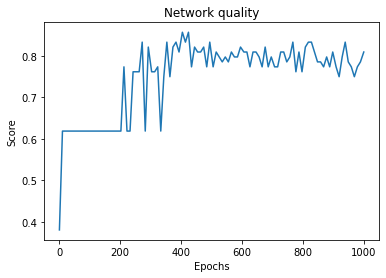

In [6]:
# Check epochs:
lr = 0.1
epochs_list = np.linspace(0, 1000, 100, dtype=int)

score = []
for epochs in epochs_list:
    clf = MultiLayers_Classifier(layers, lr, epochs)
    clf.fit_classifier(X_train, y_train)
    (answers, label) = clf.predict(X_test)
    score.append(clf.get_score(label, y_test))
    
plt.plot(epochs_list, score)
plt.title('Network quality')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

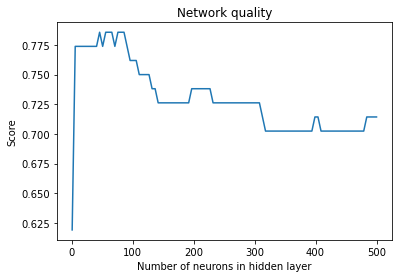

In [7]:
epochs = 100
lr = 0.1
num_hidden_neurons_list = np.linspace(1, 500, 100, dtype=int)

score = []
for num_hidden_neurons in num_hidden_neurons_list:
    layers = [num_features, num_hidden_neurons, num_classes]
    clf = MultiLayers_Classifier(layers, lr, epochs)
    clf.fit_classifier(X_train, y_train)
    (answers, label) = clf.predict(X_test)
    score.append(clf.get_score(label, y_test))

plt.plot(num_hidden_neurons_list, score)
plt.title('Network quality')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Score')
plt.show()